# Linear Regression:

This is the first model tested for Used Car Price Prediction

In [20]:
# Import Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pickle

Different brands and models were concatenated to one dataframe

In [2]:
# Read and concatenate all CSV's

path = r'D:\Data_Analytics\Project 3\Data'
all_files = glob.glob(path + "/*.csv")

li = []
brands = ["Audi","Skoda","BMW","Volkswagen","Toyota","Mercedes Benz","Ford","Hyundi"]

for filename, brand in zip(all_files, brands):
    df = pd.read_csv(filename, index_col=None, header=0)
    df["make"] = brand
    li.append(df)
    
frame = pd.concat(li, axis=0, ignore_index=True)
frame


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,Audi
...,...,...,...,...,...,...,...,...,...,...
85550,I30,2016,8680,Manual,25906,Diesel,0,78.4,1.6,Hyundi
85551,I40,2015,7830,Manual,59508,Diesel,30,65.7,1.7,Hyundi
85552,I10,2017,6830,Manual,13810,Petrol,20,60.1,1.0,Hyundi
85553,Tucson,2018,13994,Manual,23313,Petrol,145,44.8,1.6,Hyundi


In [3]:
frame["model"]= frame["model"].str.lstrip()
frame

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,Audi
...,...,...,...,...,...,...,...,...,...,...
85550,I30,2016,8680,Manual,25906,Diesel,0,78.4,1.6,Hyundi
85551,I40,2015,7830,Manual,59508,Diesel,30,65.7,1.7,Hyundi
85552,I10,2017,6830,Manual,13810,Petrol,20,60.1,1.0,Hyundi
85553,Tucson,2018,13994,Manual,23313,Petrol,145,44.8,1.6,Hyundi


In [4]:
frame.to_csv("test.csv")

In [5]:
frame_filtered = frame.loc[frame['year'] != 2060]
frame_filtered

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,Audi
...,...,...,...,...,...,...,...,...,...,...
85550,I30,2016,8680,Manual,25906,Diesel,0,78.4,1.6,Hyundi
85551,I40,2015,7830,Manual,59508,Diesel,30,65.7,1.7,Hyundi
85552,I10,2017,6830,Manual,13810,Petrol,20,60.1,1.0,Hyundi
85553,Tucson,2018,13994,Manual,23313,Petrol,145,44.8,1.6,Hyundi


In [6]:
frame_filtered.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
make            0
dtype: int64

# Pipeline

Categorical and Numeric Features were preprocessed separately

In [7]:
# define numeric features
num_features = ['year','mileage',
                    'tax','mpg',
                    'engineSize']

# Pipeline steps to transform numeric features
num_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant')),('poly',PolynomialFeatures(degree = 3)),
                                      ('scaler', StandardScaler())])

In [8]:
# define categorical features
cat_features = ['model','transmission','fuelType','make']

# Pipeline to transform (encode) categorical features
cat_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [9]:
# Use "ColumnTransformer" to join both categorical and numeric pipelines

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

In [10]:
# Create a pipeline that execute "preprocessor" and the LinearRegression model

regression = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', LinearRegression())])

# Training & Evaluating 

In [11]:
# Define X, y

X = frame_filtered.drop('price', axis = 1)
y = frame_filtered['price']

# Split X,y into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
regression.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='constant',
                                                           

In [12]:
X_train[:1]

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,make
40184,Up,2013,Manual,30442,Petrol,20,60.1,1.0,Volkswagen


In [13]:
# Evaluate the model for train data
regression.score(X_train, y_train)

0.9192690385721196

In [14]:
# Evaluate the model for test data
regression.score(X_test, y_test)

0.9058572416641114

# Residual Plot

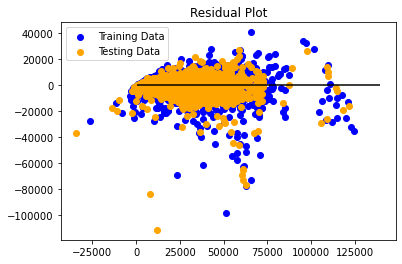

In [15]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
predictions = regression.predict(X_test)
plt.scatter(regression.predict(X_train), regression.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(regression.predict(X_test), regression.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [16]:
X_test[:10]

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,make
83963,IX20,2018,Manual,3250,Petrol,145,37.2,1.6,Hyundi
48144,Aygo,2015,Manual,34231,Petrol,0,69.0,1.0,Toyota
61570,GLC Class,2017,Automatic,28037,Diesel,125,56.5,2.1,Mercedes Benz
38054,Tiguan,2018,Semi-Auto,21430,Petrol,145,38.2,2.0,Volkswagen
6804,Q2,2019,Manual,942,Petrol,145,47.1,1.0,Audi
16341,Kodiaq,2017,Automatic,12300,Petrol,145,44.8,1.4,Skoda
77528,Focus,2017,Manual,42632,Diesel,150,74.3,1.5,Ford
2683,Q5,2018,Semi-Auto,17936,Petrol,145,40.4,2.0,Audi
63510,Fiesta,2019,Manual,7995,Petrol,145,60.1,1.0,Ford
30849,Golf,2019,Semi-Auto,3238,Diesel,150,52.3,2.0,Volkswagen


In [17]:
y_test[:10]

83963    12995
48144     5789
61570    26989
38054    26689
6804     19990
16341    23000
77528    10999
2683     31962
63510    14998
30849    19490
Name: price, dtype: int64

# Predictions

In [18]:
# predictions with test data
encoded_prediction= regression.predict(X_test[:10])
# Actual data
actual = list(y_test[:10])

print(f"Predicted classes: {encoded_prediction}")
print(f"Actual Labels: {actual}")

Predicted classes: [15201.52319867  4767.09525983 25609.13064761 24816.5209826
 20701.06212172 20035.65998684 10414.49178406 30423.30232267
 13313.23849806 24531.57570347]
Actual Labels: [12995, 5789, 26989, 26689, 19990, 23000, 10999, 31962, 14998, 19490]


In [22]:
pkl_filename = "LinearRegression.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(regression, file)